<b>Mnist without CNN</b>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(X_train))
print(len(X_test))

60000
10000


In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
print(X_test.shape)

(10000, 28, 28)


In [6]:
X_train[5].shape

(28, 28)

In [7]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

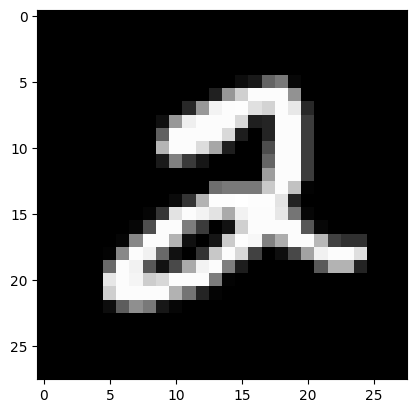

In [8]:
plt.imshow(X_train[5], cmap = "gray")

In [9]:
y_train[5]

2

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened[5].shape

(784,)

In [13]:
X_train_flattened[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
X_train_flattened[0].shape

(784,)

In [15]:
model = keras.Sequential([
        keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
        ])


model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4719 - accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2618 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9297
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2527 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.251

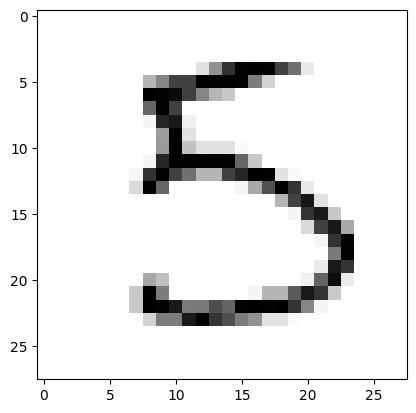

In [18]:
image_index = 15
plt.imshow(X_test[image_index], cmap = "Greys")

In [19]:
test = X_test[image_index].reshape(1, 28*28, 1)
prediction = model.predict((test))
print(prediction.argmax())

1/1 [==============================] - 0s 142ms/step
5


<b>Mnist with CNN</b>

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [21]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
print(X_train.shape)
print(X_test.shape)
input_shape = (28, 28, 1)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [24]:
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))

In [25]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(128, activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [28]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               605824    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [30]:
model.fit(X_train, y = y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1715 - accuracy: 0.9488
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0130 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0097 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 27s 14m

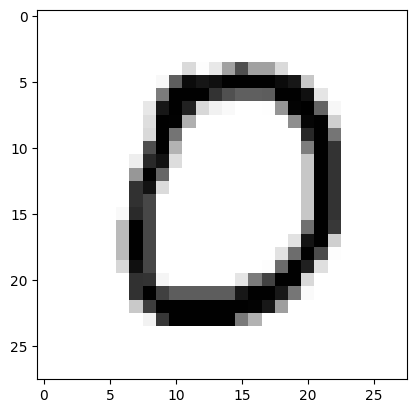

In [31]:
image_index = 10
plt.imshow(X_test[image_index], cmap = "Greys")

In [32]:
test = X_test[image_index].reshape(1, 28, 28, 1)
prediction = model.predict((test))
print(prediction.argmax())

1/1 [==============================] - 0s 110ms/step
0
